# datafun-07-applied 
### Brooke Richards 6/10/2024  
https://github.com/Karpoozi/datafun-07-applied 
#### In this project I will build a model, make predictions, visualize the model and publish my insights.

## Project Start

In [222]:
# import dependencies
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


## Part 1 - Chart a Straight Line

#### Place the data in a DataFrame

In [223]:
c = lambda f: 5/9 * (f - 32) # create a lambda to calculate Celsius from Fahrenheit
temps = [(f, c(f)) for f in range(0, 101, 10)] # use the lambda to calculate Celsius equivalents of the Fahrenheit temperatures 0–100 in 10-degree increments
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius']) # create DataFrame 

#### Display plot

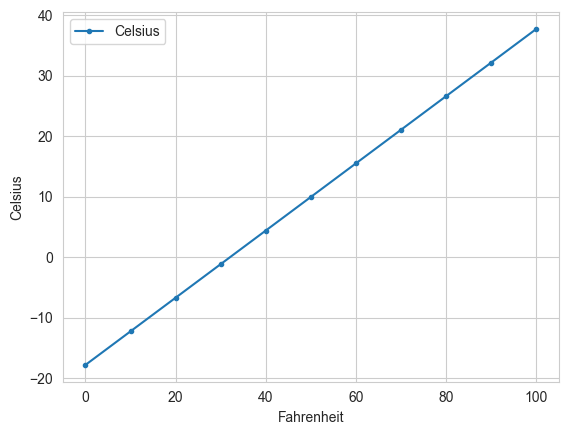

In [224]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-') # organize plot
y_label = axes.set_ylabel('Celsius') # manually label the y-axis

The equation for points on a straight line (in two dimensions), as seen in the previous graph, is: ( y = mx + b ). Here, ( m ) is the slope of the line, ( b ) is where it crosses the y-axis (at () (0, b) ), ( x ) is the independent variable (date), and ( y ) is the dependent variable (temperature). In simple linear regression, ( y ) predicts the value for a given ( x ).

## Part 2 Predict

### Section 1 - Data Acquisition

In [225]:
# download the data file to your project folder and then load the data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [226]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [227]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [228]:
# rename DataFrame columns for readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# verify changes
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [229]:
# the x-axis labels will be more readable if they do not contain 01 for January 
nyc_df.Date.dtype # check the column data type
nyc_df.Date = nyc_df.Date.floordiv(100) # each column in df is a Series, the floordiv method performs integer division on every element of the Series

# verify changes
nyc_df.head(3) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [230]:
# round statistics to .00
pd.set_option('display.precision', 2)

# display temperature stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [231]:
# use linregress function to calculate slope and intercept for the best fit line through the data
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

In [232]:
# determine slope
linear_regression.slope

0.014771361132966163

In [233]:
# determine y coordinate of the y intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [234]:
# calculate the average high temp in Jan 2024
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

(10.0, 70.0)

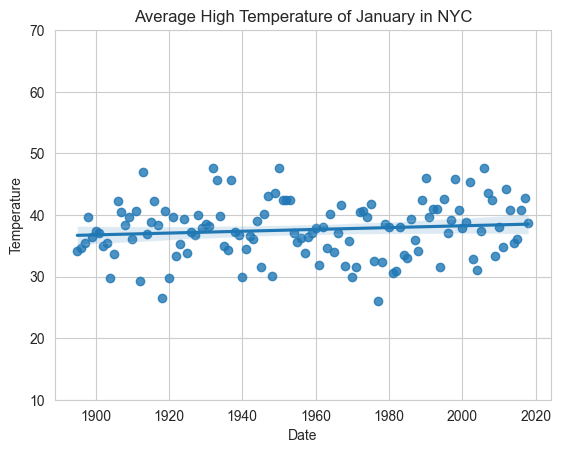

In [235]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_title('Average High Temperature of January in NYC')
axes.set_ylim(10, 70)

## Part 3 Predict

### Section 1 - Build the Model

In [236]:
# use test_train_split to split the data into parts for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

In [237]:
# check the shape of each data set
X_train.shape

(93, 1)

In [238]:
# check the shape of each data set
X_test.shape

(31, 1)

In [239]:
# train the model using Linear Regression Fit
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [240]:
# view the returned coef_ attribute
linear_regression.coef_

array([0.01939167])

In [241]:
# view the returned intercept_  attribute
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [242]:
#test the model by displaying the predicted and expected values for every fifth element
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


###  Section 3 - Predict

In [243]:
# predict the average high temp in NYC in Jan for the year 2024
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [244]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019)

array([38.84399018])

In [245]:
predict(1890)

array([36.34246432])

### Section 3 - Visualizations

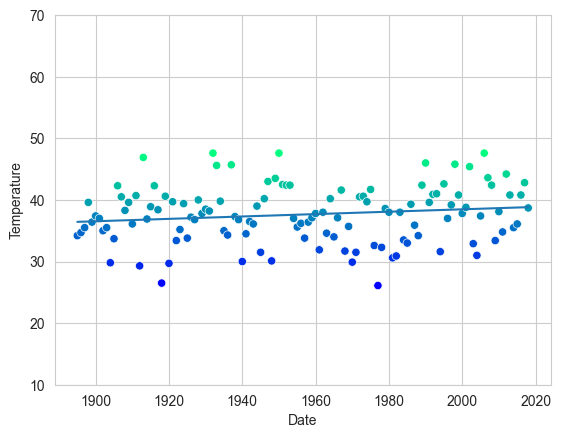

In [246]:
# plot the data
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x= np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights

Remarks comparing the two methods.

## Part 5 - Bonus